In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os

In [31]:
pwd

'C:\\Users\\ABC\\6. Datasets'

In [32]:
os.chdir('C:\\Users\\ABC\\6. Datasets')

In [33]:
df = pd.read_csv('rentalday.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
dff = df[['temp', 'hum']]
dff.head()

,temp,hum
0,0.344167,0.805833
1,0.363478,0.696087
2,0.196364,0.437273
3,0.200000,0.590435
4,0.226957,0.436957


In [35]:
km = KMeans(n_clusters=4)

In [36]:
model = km.fit_predict(dff)
model

array([0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 2, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 3, 2, 0, 3, 3, 0, 0, 0, 1, 1, 0, 3, 0, 0, 3, 2, 1, 2,
       3, 0, 0, 1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 0, 3, 3, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 2, 2, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 3,

In [37]:
cc = km.cluster_centers_
cc
a = cc[:,0]
b = cc[:,1]
cc

array([[0.35696001, 0.7488644 ],
       [0.62015332, 0.74533858],
       [0.6913564 , 0.54926314],
       [0.31935226, 0.49087622]])

In [38]:
dff['clusters'] = model
dff.head()

C:\Users\ABC\AppData\Local\Temp\ipykernel_12516\227560217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['clusters'] = model


,temp,hum,clusters
0,0.344167,0.805833,0
1,0.363478,0.696087,0
2,0.196364,0.437273,3
3,0.200000,0.590435,3
4,0.226957,0.436957,3


Text(0, 0.5, 'Humidity')

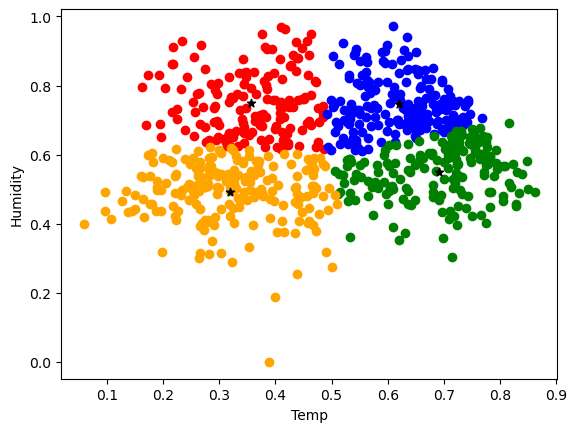

In [39]:
dff1 = dff[dff['clusters']==0]
dff2 = dff[dff['clusters']==1]
dff3 = dff[dff['clusters']==2]
dff4 = dff[dff['clusters']==3]

plt.scatter(dff1.temp, dff1.hum, color = "red")
plt.scatter(dff2.temp, dff2.hum, color = 'blue')
plt.scatter(dff3.temp, dff3.hum, color = 'green')
plt.scatter(dff4.temp, dff4.hum, color = 'orange')
plt.scatter(a,b, marker = "*", color = 'Black')
plt.xlabel('Temp')
plt.ylabel('Humidity')

In [41]:
km.inertia_

10.25115316923444

In [45]:
dff.drop('clusters', axis = 1)

,temp,hum
0,0.344167,0.805833
1,0.363478,0.696087
2,0.196364,0.437273
3,0.200000,0.590435
4,0.226957,0.436957
...,...,...
726,0.254167,0.652917
727,0.253333,0.590000
728,0.253333,0.752917
729,0.255833,0.483333


In [56]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    model = km.fit_predict(dff)
    sse.append(km.inertia_)
sse

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[947.4964976364276,
 211.3219504825497,
 103.44024613213882,
 10.25115316923444,
 8.893337213950687,
 7.76294040212758,
 6.8272788798656485,
 6.047593832274685,
 5.448386488405157]

In [57]:
sh = silhouette_score(dff, model)
sh

0.38401521847419745